In [1]:
import numpy as np

# some_file.py
import sys
sys.path.insert(0, '../src/easyesn/')

In [2]:
from easyesn.optimizers import GradientOptimizer
from easyesn import PredictionESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
import matplotlib.pyplot as plt


Using Numpy backend.


In [3]:
inputLength = 1000
data = np.sin(np.linspace(0, 4*np.pi, inputLength)).reshape(-1,1)
targetData = np.roll(data, -1)

inputData = data[:int(inputLength*0.7)]
validationData = data[int(inputLength*0.3):]

inputTarget = targetData[:int(inputLength*0.7)]
validationTarget = targetData[int(inputLength*0.3):]

In [4]:
esn = PredictionESN(n_input=1, n_output=1, n_reservoir=50, regression_parameters=[1e-2], solver="lsqr", feedback=True)

## GradientOptimizer - Prediction

In [5]:
opt = GradientOptimizer(esn, learningRate=0.001)

In [6]:
validationLosses, fitLosses, spectralRadiuses, leakingRates, inputScalings = opt.optimizeParameterForTrainError(inputData, inputTarget, validationData, validationTarget, epochs=150, transientTime=100)

100% (150 of 150) |#######################| Elapsed Time: 0:00:49 Time: 0:00:49


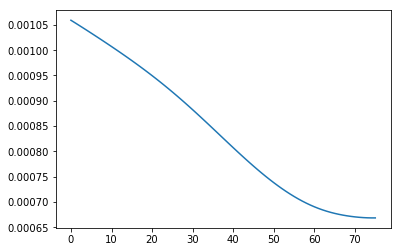

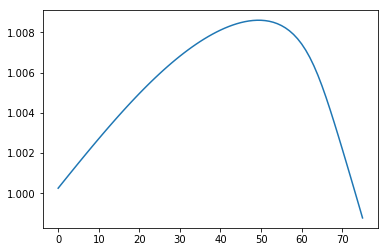

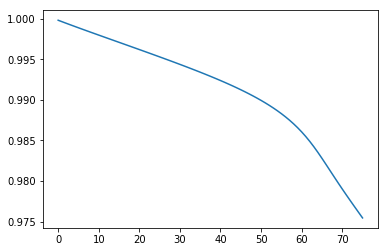

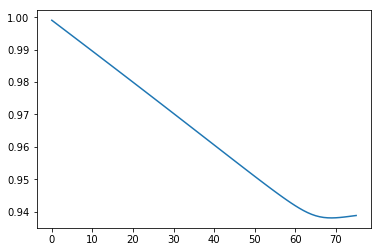

In [7]:
plt.plot(fitLosses)
plt.show()
plt.plot(spectralRadiuses)
plt.show()
plt.plot(leakingRates)
plt.show()
plt.plot(inputScalings)
plt.show()

## GradientOptimization - Generation

In [7]:
esn = PredictionESN(n_input=0, n_output=1, n_reservoir=50, regression_parameters=[1e-2], solver="lsqr", feedback=True)

In [8]:
opt = GradientOptimizer(esn, learningRate=0.001)

In [9]:
validationLosses, fitLosses, spectralRadiuses, leakingRates, inputScalings = opt.optimizeParameterForGenerativeValidationError(inputData, inputTarget, validationTarget, epochs=150, transientTime=100)

[[ 0.        ]
 [ 0.01257862]
 [ 0.02515525]
 [ 0.03772789]
 [ 0.05029457]
 [ 0.06285329]
 [ 0.07540206]
 [ 0.08793891]
 [ 0.10046184]
 [ 0.11296887]
 [ 0.12545803]
 [ 0.13792734]
 [ 0.15037482]
 [ 0.16279851]
 [ 0.17519644]
 [ 0.18756665]
 [ 0.19990719]
 [ 0.21221609]
 [ 0.22449141]
 [ 0.23673121]
 [ 0.24893355]
 [ 0.26109651]
 [ 0.27321815]
 [ 0.28529657]
 [ 0.29732984]
 [ 0.30931606]
 [ 0.32125334]
 [ 0.33313979]
 [ 0.34497353]
 [ 0.35675269]
 [ 0.36847539]
 [ 0.3801398 ]
 [ 0.39174405]
 [ 0.40328632]
 [ 0.41476478]
 [ 0.42617761]
 [ 0.43752301]
 [ 0.44879918]
 [ 0.46000434]
 [ 0.47113671]
 [ 0.48219453]
 [ 0.49317606]
 [ 0.50407956]
 [ 0.51490329]
 [ 0.52564555]
 [ 0.53630464]
 [ 0.54687888]
 [ 0.55736658]
 [ 0.56776609]
 [ 0.57807576]
 [ 0.58829397]
 [ 0.59841909]
 [ 0.60844952]
 [ 0.61838368]
 [ 0.62822   ]
 [ 0.63795691]
 [ 0.64759288]
 [ 0.65712639]
 [ 0.66655591]
 [ 0.67587997]
 [ 0.68509709]
 [ 0.69420581]
 [ 0.70320468]
 [ 0.71209229]
 [ 0.72086722]
 [ 0.72952809]
 [ 0.73807

AttributeError: 'NoneType' object has no attribute 'reshape'

In [ ]:
plt.plot(fitLosses)
plt.show()
plt.plot(spectralRadiuses)
plt.show()
plt.plot(leakingRates)
plt.show()
plt.plot(inputScalings)
plt.show()